<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/main/scikit_test_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import os
import random
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [15]:
# pull train and test data from the folder
root = '/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/'
folder = '10_frames_stim1/'
f_names = os.listdir(root + folder)

cols = pd.read_csv(root + folder + f_names[0]).columns

df_train = pd.DataFrame(columns=cols)
df_test = pd.DataFrame(columns=cols)
df_val = pd.DataFrame(columns=cols)

for f in f_names:
  df = pd.read_csv(root + folder + f)
  if 'train' in f.split('_')[-1]:
    df_train = pd.concat([df_train, df])
  if 'test' in f.split('_')[-1]:
    df_test = pd.concat([df_test, df])
  if 'val' in f.split('_')[-1]:
    df_val = pd.concat([df_val, df])

In [16]:
df_train

,stack,label,roi,frame,filename,resp,stim1,stim2,stim3,relation_type_stim1,...,relation_stim1_NRPS-PRNS,relation_stim1_NRPS-PRPS,relation_stim1_PRNS-NRNS,relation_stim1_PRNS-NRPS,relation_stim1_PRNS-PRNS,relation_stim1_PRNS-PRPS,relation_stim1_PRPS-NRNS,relation_stim1_PRPS-NRPS,relation_stim1_PRPS-PRNS,relation_stim1_PRPS-PRPS
0,1,tm2,1,0,210816_0_1_stackRaw_mc_result_20220304T112124.h5,-0.326919,-0.308124,-89.396360,0.136451,NRNS,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
1,1,tm2,1,1,210816_0_1_stackRaw_mc_result_20220304T112124.h5,-0.207673,-0.308124,0.000000,0.000000,NRNS,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
2,1,tm2,1,2,210816_0_1_stackRaw_mc_result_20220304T112124.h5,-0.135514,-0.308124,0.000000,0.000000,NRNS,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
3,1,tm2,1,3,210816_0_1_stackRaw_mc_result_20220304T112124.h5,-0.299841,-0.020208,159.307519,0.018253,NRNS,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
4,1,tm2,1,4,210816_0_1_stackRaw_mc_result_20220304T112124.h5,-0.127388,0.267709,115.439141,0.071810,NRPS,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423726,11,t5,7,5498,210731_0_11_stackRaw_mc_mix2_syt_result_202203...,0.691645,0.202075,62.322086,0.038643,PRPS,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.317648e-14
423727,11,t5,7,5499,210731_0_11_stackRaw_mc_mix2_syt_result_202203...,-0.234363,0.203980,87.566001,0.005355,NRPS,...,0.0,2.278630e-15,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
423728,11,t5,7,5500,210731_0_11_stackRaw_mc_mix2_syt_result_202203...,0.841037,0.201777,165.228125,0.005023,PRPS,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.389093e-11
423729,11,t5,7,5501,210731_0_11_stackRaw_mc_mix2_syt_result_202203...,0.686215,-0.109233,156.838327,0.049430,PRNS,...,0.0,0.000000e+00,0.0,0.0,0.0,7.475436e-14,0.0,0.0,0.0,0.000000e+00


In [17]:
df_test

,stack,label,roi,frame,filename,resp,stim1,stim2,stim3,relation_type_stim1,...,relation_stim1_NRPS-PRNS,relation_stim1_NRPS-PRPS,relation_stim1_PRNS-NRNS,relation_stim1_PRNS-NRPS,relation_stim1_PRNS-PRNS,relation_stim1_PRNS-PRPS,relation_stim1_PRPS-NRNS,relation_stim1_PRPS-NRPS,relation_stim1_PRPS-PRNS,relation_stim1_PRPS-PRPS
0,1,tm2,1,0,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,-0.106575,-0.395877,160.447960,0.110063,NRNS,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
1,1,tm2,1,1,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.244535,-0.395877,0.000000,0.000000,PRNS,...,0.0,0.0,0.0,0.0,0.0,2.417284e-17,0.0,0.0,0.000000e+00,0.000000e+00
2,1,tm2,1,2,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.398458,-0.395877,0.000000,0.000000,PRNS,...,0.0,0.0,0.0,0.0,0.0,2.833944e-14,0.0,0.0,0.000000e+00,0.000000e+00
3,1,tm2,1,3,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.619290,-0.138699,170.252676,0.030790,PRNS,...,0.0,0.0,0.0,0.0,0.0,7.960630e-16,0.0,0.0,0.000000e+00,0.000000e+00
4,1,tm2,1,4,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.627615,0.890013,-62.485104,0.122134,PRPS,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,9.590115e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594319,9,tm4,12,5498,210728_0_9_stackRaw_mc_tm2_tm9_syt_result_2022...,0.304771,0.482281,-124.617985,0.029550,PRPS,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,2.422112e-13,0.000000e+00
594320,9,tm4,12,5499,210728_0_9_stackRaw_mc_tm2_tm9_syt_result_2022...,0.572298,0.613607,-3.163166,0.001918,PRPS,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,3.816035e-14
594321,9,tm4,12,5500,210728_0_9_stackRaw_mc_tm2_tm9_syt_result_2022...,0.460452,0.332815,-95.416102,0.015904,PRPS,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,1.917126e-17
594322,9,tm4,12,5501,210728_0_9_stackRaw_mc_tm2_tm9_syt_result_2022...,0.626407,0.016469,136.837402,0.043392,PRPS,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,6.448637e-20,0.000000e+00


In [ ]:
#reading in the four files that have our data with different time windows for the stim1 features
df5 = pd.read_csv('/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/210815_0_20220213T070259_sparse_stim1_5f.csv').drop_duplicates()
df10 = pd.read_csv('/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/210815_0_20220213T070259_sparse_stim1_10f.csv').drop_duplicates()
df15 = pd.read_csv('/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/210815_0_20220213T070259_sparse_stim1_15f.csv').drop_duplicates()
df20 = pd.read_csv('/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/210815_0_20220213T070259_sparse_stim1_20f.csv').drop_duplicates()


In [ ]:
#add a unique roi id to each table
df_list = [df5, df10, df15, df20]
for df in df_list:
  df['roi_ID'] = df['stack'].astype(str) + '_' + df['roi'].astype(str)
df5.head()

,stack,label,roi,frame,filename,resp,stim1,stim2,stim3,direction_quadrant_1,direction_quadrant_2,direction_quadrant_3,direction_quadrant_4,relation_type_stim1,relation_stim1,relation_stim1_future,relation_type_stim1_future,relation_stim1_NRNS-NRNS,relation_stim1_NRNS-NRPS,relation_stim1_NRNS-PRNS,relation_stim1_NRNS-PRPS,relation_stim1_NRPS-NRNS,relation_stim1_NRPS-NRPS,relation_stim1_NRPS-PRNS,relation_stim1_NRPS-PRPS,relation_stim1_PRNS-NRNS,relation_stim1_PRNS-NRPS,relation_stim1_PRNS-PRNS,relation_stim1_PRNS-PRPS,relation_stim1_PRPS-NRNS,relation_stim1_PRPS-NRPS,relation_stim1_PRPS-PRNS,relation_stim1_PRPS-PRPS,roi_ID
0,1,tm2,1,0,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,-0.106575,-0.395877,160.447960,0.110063,0,0,0,1,NRNS,0.044529,0.131292,PRPS,0.0,0.0,0.0,0.005846,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,1_1
1,1,tm2,1,1,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.244535,-0.395877,0.000000,0.000000,0,0,1,0,PRNS,0.023493,0.078554,PRPS,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001845,0.0,0.0,0.00000,0.0,1_1
2,1,tm2,1,2,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.398458,-0.395877,0.000000,0.000000,0,0,1,0,PRNS,0.038280,0.041351,PRPS,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001583,0.0,0.0,0.00000,0.0,1_1
3,1,tm2,1,3,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.619290,-0.138699,170.252676,0.030790,0,0,0,1,PRNS,0.020845,0.000330,PRNS,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,0.00000,0.0,1_1
4,1,tm2,1,4,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.627615,0.890013,-62.485104,0.122134,0,1,0,0,PRPS,0.134750,0.000294,PRNS,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00004,0.0,1_1


In [ ]:
#check the col indices holding the stim1 features
df5.columns[17:33]

Index(['relation_stim1_NRNS-NRNS', 'relation_stim1_NRNS-NRPS',
       'relation_stim1_NRNS-PRNS', 'relation_stim1_NRNS-PRPS',
       'relation_stim1_NRPS-NRNS', 'relation_stim1_NRPS-NRPS',
       'relation_stim1_NRPS-PRNS', 'relation_stim1_NRPS-PRPS',
       'relation_stim1_PRNS-NRNS', 'relation_stim1_PRNS-NRPS',
       'relation_stim1_PRNS-PRNS', 'relation_stim1_PRNS-PRPS',
       'relation_stim1_PRPS-NRNS', 'relation_stim1_PRPS-NRPS',
       'relation_stim1_PRPS-PRNS', 'relation_stim1_PRPS-PRPS'],
      dtype='object')

In [ ]:
#check the col indices holding the directional features
#right now these are binary
df5.columns[9:13]

Index(['direction_quadrant_1', 'direction_quadrant_2', 'direction_quadrant_3',
       'direction_quadrant_4'],
      dtype='object')

In [ ]:
#scale the raw response
for df in df_list:
  df['resp_scaled'] = df['resp'] /df['resp'].abs().max() #just divide by the max value

#TEMPORARILY distribute the scaled response into the directional columns - probably needs to be more involved than this
directional_cols = [col for col in df5.columns if 'direction' in col]

for df in df_list:
  for col in directional_cols:
    df[col] = df['resp_scaled'] * df[col]

df10.head()

,stack,label,roi,frame,filename,resp,stim1,stim2,stim3,direction_quadrant_1,direction_quadrant_2,direction_quadrant_3,direction_quadrant_4,relation_type_stim1,relation_stim1,relation_stim1_future,relation_type_stim1_future,relation_stim1_NRNS-NRNS,relation_stim1_NRNS-NRPS,relation_stim1_NRNS-PRNS,relation_stim1_NRNS-PRPS,relation_stim1_NRPS-NRNS,relation_stim1_NRPS-NRPS,relation_stim1_NRPS-PRNS,relation_stim1_NRPS-PRPS,relation_stim1_PRNS-NRNS,relation_stim1_PRNS-NRPS,relation_stim1_PRNS-PRNS,relation_stim1_PRNS-PRPS,relation_stim1_PRPS-NRNS,relation_stim1_PRPS-NRPS,relation_stim1_PRPS-PRNS,relation_stim1_PRPS-PRPS,roi_ID,resp_scaled
0,1,tm2,1,0,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,-0.106575,-0.395877,160.447960,0.110063,-0.0,-0.000000,-0.000000,-0.025431,NRNS,0.044529,0.000568,PRNS,0.0,0.0,0.000025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1_1,-0.025431
1,1,tm2,1,1,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.244535,-0.395877,0.000000,0.000000,0.0,0.000000,0.058351,0.000000,PRNS,0.023493,0.035698,PRPS,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000839,0.0,0.0,0.0,0.000000,1_1,0.058351
2,1,tm2,1,2,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.398458,-0.395877,0.000000,0.000000,0.0,0.000000,0.095081,0.000000,PRNS,0.038280,0.128194,PRPS,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004907,0.0,0.0,0.0,0.000000,1_1,0.095081
3,1,tm2,1,3,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.619290,-0.138699,170.252676,0.030790,0.0,0.000000,0.000000,0.147776,PRNS,0.020845,0.096379,PRPS,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002009,0.0,0.0,0.0,0.000000,1_1,0.147776
4,1,tm2,1,4,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.627615,0.890013,-62.485104,0.122134,0.0,0.149762,0.000000,0.000000,PRPS,0.134750,0.087835,PRPS,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.011836,1_1,0.149762


In [ ]:
#average each df by roi
df5 = df5.groupby(['roi_ID', 'label']).mean().reset_index()
df10 = df10.groupby(['roi_ID', 'label']).mean().reset_index()
df15 = df15.groupby(['roi_ID', 'label']).mean().reset_index()
df20 = df20.groupby(['roi_ID', 'label']).mean().reset_index()

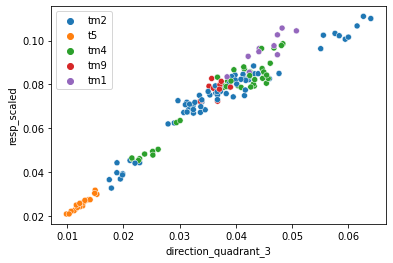

In [ ]:
#playing with visualizing the data
#single direction of the stimulus vs the scaled response seems to separate t5 in our 10-frame windowed table
sns.scatterplot(x=df10['direction_quadrant_3'], y=df10['resp_scaled'], hue=df10['label'])
plt.legend()

In [ ]:
#train test split by roi_ID so that no single roi is included in the training and testing data
#Right now the split is random

#get a list of the unique rois
rois = df5.drop_duplicates('roi_ID')[['roi_ID', 'label']]

#treat them like the roi and labels are their own dataset
X = np.array(rois['roi_ID'])
y = np.array(rois['label'])


#split into training and testing - returns the indexes
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0) #40% testing
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

#These are lists of the rois to be included in each split, not the actual data
X_train_rois, X_test_rois = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


TRAIN: [118 103 126  59  10  45  57 146  51 127   8  31  98 138  40  53 115  94
 114  15 148  32 113  47  80  62  44  64  77 141  20  35  41 120  24  70
  90 134  38  93  55  46 110   5 102   2 104 101  95 137  25 135  27 107
 139  16  88  34  87 109  79   7  50  67  91  89  54  85  12 119  17  73
  78  71 147  58 106 125 124  13  29 133 129  56   4  92  96  69  97] TEST: [105  81  36   3 100  74 136  21 140 132  39   9  49  84  75  63   1   6
   0 145  52 130 121 123  60  83  72 117  43 144 122  19  86  76  65  42
 116  33  61  18  14 111 142 143  22  30  23  99 108  82 128 131  26  68
  11  37 112  66  28  48]


In [ ]:
#get the column names we want to use as features
data_cols = [col for col in df5.columns if 'direction' in col or ('relation_stim1_' in col and 'future' not in col)]
data_cols

['direction_quadrant_1',
 'direction_quadrant_2',
 'direction_quadrant_3',
 'direction_quadrant_4',
 'relation_stim1_NRNS-NRNS',
 'relation_stim1_NRNS-NRPS',
 'relation_stim1_NRNS-PRNS',
 'relation_stim1_NRNS-PRPS',
 'relation_stim1_NRPS-NRNS',
 'relation_stim1_NRPS-NRPS',
 'relation_stim1_NRPS-PRNS',
 'relation_stim1_NRPS-PRPS',
 'relation_stim1_PRNS-NRNS',
 'relation_stim1_PRNS-NRPS',
 'relation_stim1_PRNS-PRNS',
 'relation_stim1_PRNS-PRPS',
 'relation_stim1_PRPS-NRNS',
 'relation_stim1_PRPS-NRPS',
 'relation_stim1_PRPS-PRNS',
 'relation_stim1_PRPS-PRPS']

In [ ]:
def train_test_resample_scale(df, data_cols):
  """
  Function to take in the different df's and return training and testing data
  Useful to try different time windows without tracking a bunch of variables
  """

  #use the roi_id's as indexes to split train and test from our full df
  X_train = df.query('roi_ID in @X_train_rois')[data_cols] 
  y_train = df.query('roi_ID in @X_train_rois')['label'] 

  X_test = df.query('roi_ID in @X_test_rois')[data_cols] 
  y_test = df.query('roi_ID in @X_test_rois')['label']     

  #resample the training set to balance the classes (upsampling the underrepresented classes)
  from imblearn.over_sampling import SMOTE
  smote_nc = SMOTE(random_state=0, k_neighbors = 3)
  X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

  #Scale based on X_train to avoid data leakage
  scaler = StandardScaler() 
  scaler.fit(X_train_resampled)
  X_train_resampled = scaler.transform(X_train_resampled)  
  # apply same transformation to test data
  X_test = scaler.transform(X_test)

  return X_train_resampled, y_train_resampled, X_test, y_test

# try models based on 5-frame stim1 window

In [ ]:
#change the df used here to try different time windows
X_train_resampled, y_train_resampled, X_test, y_test = train_test_resample_scale(df5, data_cols) 

In [ ]:
#multilayer perceptron (neural net)
model = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000000, verbose = False, tol = .0000001)
model.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000000, tol=1e-07)

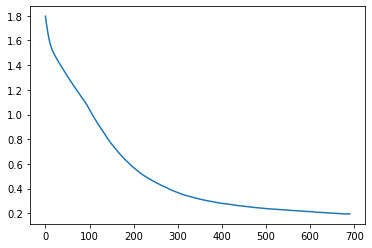

In [ ]:
plt.plot(model.loss_curve_) #looks like with more data we would continue improving

In [ ]:
#return the predicted classes and probabilities
preds_prob = model.predict_proba(X_test)
preds = model.predict(X_test)
print(model.classes_)

['t5' 'tm1' 'tm2' 'tm4' 'tm9']


0.7666666666666667
              precision    recall  f1-score   support

          t5       1.00      1.00      1.00         8
         tm1       0.80      1.00      0.89         4
         tm2       0.74      0.82      0.78        28
         tm4       0.80      0.50      0.62        16
         tm9       0.50      0.75      0.60         4

    accuracy                           0.77        60
   macro avg       0.77      0.81      0.78        60
weighted avg       0.78      0.77      0.76        60



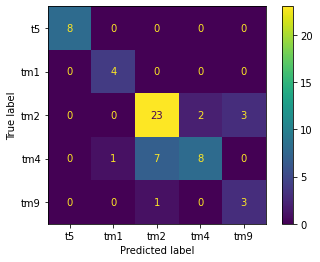

In [ ]:
print(model.score(X_test, y_test)) 
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [ ]:
#knn
model = KNeighborsClassifier(3)
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

0.75
              precision    recall  f1-score   support

          t5       1.00      1.00      1.00         8
         tm1       0.80      1.00      0.89         4
         tm2       0.90      0.64      0.75        28
         tm4       0.75      0.75      0.75        16
         tm9       0.27      0.75      0.40         4

    accuracy                           0.75        60
   macro avg       0.74      0.83      0.76        60
weighted avg       0.82      0.75      0.77        60



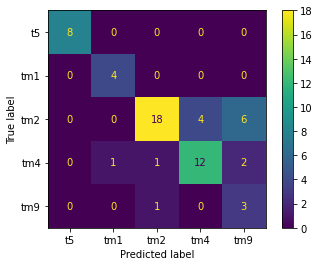

In [ ]:
print(model.score(X_test, y_test)) 
preds_prob = model.predict_proba(X_test)
preds = model.predict(X_test)
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test, preds)

Nearest Neighbors: score: 0.75


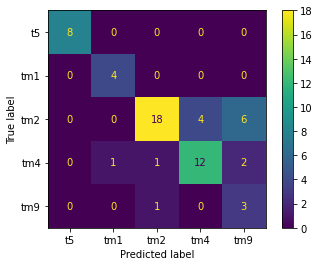

Linear SVM: score: 0.5833333333333334


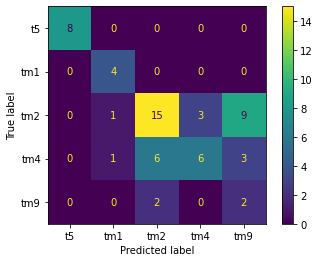

RBF SVM: score: 0.55


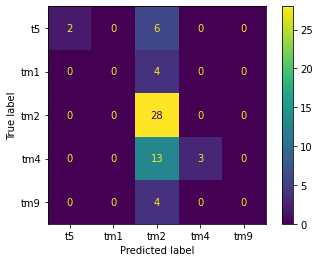

Gaussian Process: score: 0.7666666666666667


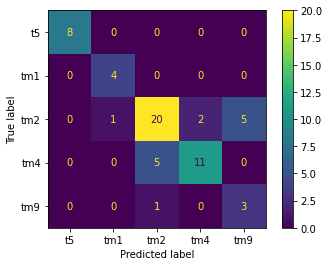

Decision Tree: score: 0.43333333333333335


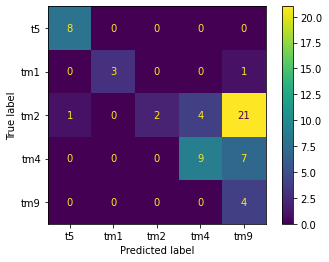

Random Forest: score: 0.6166666666666667


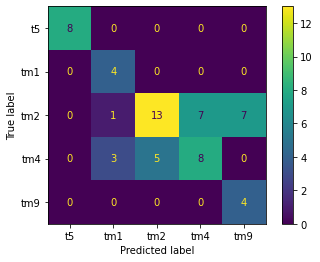

Neural Net: score: 0.7666666666666667


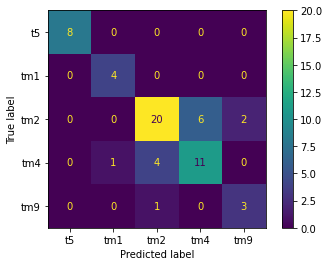

AdaBoost: score: 0.4166666666666667


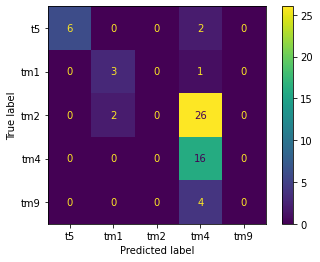

Naive Bayes: score: 0.7


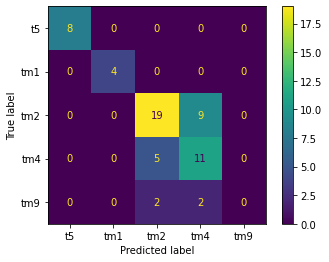

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA: score: 0.48333333333333334


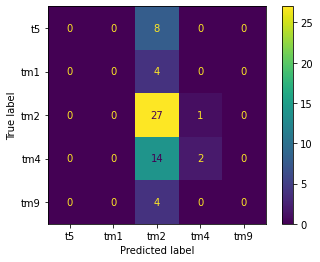

In [ ]:
#try the sklearn loop over different models, haven't messed with plotting decision boundaries since we have so many dimensions

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1),
    MLPClassifier(alpha=.01, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train_resampled, y_train_resampled)
    score = clf.score(X_test, y_test)
    print(f'{name}: score: {score}')

    preds = clf.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.show()


# Old code to take frame-level predictions and use the most frequent prediction at the roi level

In [ ]:
# #add the classes and probabilities back to the df of test set records
# test_df = df.query('roi_ID in @X_test_rois')
# test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
# test_df['pred'] = preds

In [ ]:
# #groupby the roi_id and predicted class to see the number of times each cell was predicted which class
# #right now it classifies everything as tm1
# max_preds = test_df.groupby(['roi_ID', 'pred']).count() \
#     .reset_index() \
#     .sort_values(['roi_ID', 'label'], ascending = False) \
#     .drop_duplicates('roi_ID', keep='first') \
#     [['roi_ID', 'pred']] \
#     .rename(columns = {'pred': 'most_predicted_class'}) \
#     .set_index('roi_ID')


In [ ]:
# max_preds.head()

In [ ]:
# #get the actual labels for the rois in the test set
# test_labels = test_df[['roi_ID', 'label']].drop_duplicates('roi_ID').set_index('roi_ID')
# test_labels.head()

In [ ]:
# #join the actual labels to the most predicted class labels
# max_preds = max_preds.join(test_labels)
# max_preds.head()

In [ ]:
# #show the confusion matrix for the test set rois
# print(classification_report(max_preds['label'], max_preds['most_predicted_class']))
# ConfusionMatrixDisplay.from_predictions(max_preds['label'], max_preds['most_predicted_class'])

In [ ]:
# #return the predicted classes and probabilities
# preds_prob = model.predict_proba(X_test)
# preds = model.predict(X_test)
# print(model.classes_)
# preds_prob

In [ ]:
# #add the classes and probabilities back to the df of test set records
# test_df = df.query('roi_ID in @X_test_rois')
# test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
# test_df['pred'] = preds

In [ ]:
# #groupby the roi_id and predicted class to see the number of times each cell was predicted which class
# #right now it classifies everything as tm1
# max_preds = test_df.groupby(['roi_ID', 'pred']).count() \
#     .reset_index() \
#     .sort_values(['roi_ID', 'label'], ascending = False) \
#     .drop_duplicates('roi_ID', keep='first') \
#     [['roi_ID', 'pred']] \
#     .rename(columns = {'pred': 'most_predicted_class'}) \
#     .set_index('roi_ID')


In [ ]:
# max_preds.head()

In [ ]:
# #get the actual labels for the rois in the test set
# test_labels = test_df[['roi_ID', 'label']].drop_duplicates('roi_ID').set_index('roi_ID')
# test_labels.head()

In [ ]:
# #join the actual labels to the most predicted class labels
# max_preds = max_preds.join(test_labels)
# max_preds.head()

In [ ]:
# #show the confusion matrix for the test set rois
# ConfusionMatrixDisplay.from_predictions(max_preds['label'], max_preds['most_predicted_class'])